<a href="https://colab.research.google.com/github/joaozz21/BBC19JOAOHENRIQUE/blob/main/Tarefa10Jo%C3%A3oHenrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##João Henrique Alves de Oliveira 

**1)** Para este item você deverá usar o arquivo [com todos os resultados do campeonato Brasileiro de futebol de 2018 (tabelaBrasileirao2018.csv encontrado na pasta aula5/dados)](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv) (dados obtidos [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(primeiro_turno)>) e [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(segundo_turno)>) página da Wikipedia).

- Calcule (e mostre o resultado) a porcentagem de jogos que o time da casa (mandante) ganhou o jogo.

- Calcule (e mostre o resultado) a porcentagem de jogos que o time da casa (mandante) não perdeu o jogo.

In [61]:
from pandas.core.base import value_counts
import pandas as pd
import numpy as np

#a)
brasileirao = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')
brasileirao['Mandante Venceu'] = brasileirao['Placar do Mandante']>brasileirao['Placar do Visitante']
mandante=brasileirao['Mandante Venceu'].value_counts()
forma = brasileirao.shape
porcentagem= (mandante[True]*100)/forma[0]

print('A porcentagem de jogos em que o time da casa ganhou foi de',porcentagem,'%')

A porcentagem de jogos em que o time da casa ganhou foi de 53.1578947368421 %


In [64]:
import pandas as pd
import numpy as np

#b)
brasileirao = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')
brasileirao['Mandante n perdeu'] = brasileirao['Placar do Mandante']>=brasileirao['Placar do Visitante']
mandante=brasileirao['Mandante n perdeu'].value_counts()
forma = brasileirao.shape
porcentagem = (mandante[True]*100)/forma[0]

print('A porcentagem de jogos em que o time da casa não perdeu foi de',porcentagem,'%')

A porcentagem de jogos em que o time da casa não perdeu foi de 82.10526315789474 %


**2)**  Para este item você deverá usar o arquivo com a [taxa de inflação mensal (IGP-DI) no Brasil de fevereiro de 1944 a junho de 2019](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv) (dados disponibilizados por Ipeadata). 

- Faça um gráfico da taxa de inflação mensal em função do tempo.
- Mostre em que mês e ano e qual foi a maior taxa de inflação mensal medida neste período (fevereiro de 1944 a junho de 2019).

Dica: para fazer o gráfico, note que um mês corresponde a um doze avos de ano. Para facilitar a criação do gráfico você pode criar uma outra coluna que corresponda ao ano adicionado da fração correspondente ao mês.

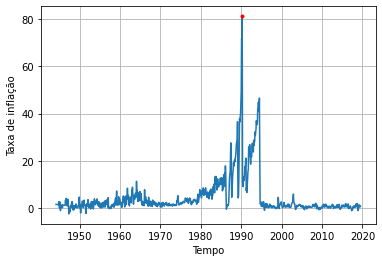

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#a)
tabela= pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv')
tabela['Ano+Mês'] = tabela['Ano']+tabela['Mês']/12
ano=tabela['Ano+Mês']
inflacao= tabela['Inflação']
max=inflacao.max()

#b)
plt.figure()
plt.plot(ano,inflacao)
plt.plot(ano[inflacao==max],max, marker = '.', color = 'red')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Taxa de inflação')
plt.show()

**3)** Para este item você pode usar [esse histórico de visualização do Netflix](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/netflix.csv) ou, se você tiver acesso ao Netflix, usar o seu [histórico](https://www.netflix.com/viewingactivity) (após entrar com a sua senha, role até o final da página e clique em "Baixar tudo").

   + Mostre quais são os 10 programas mais vistos.
   + Em qual mês do ano foi assistido mais programas? 
    
Sugestão: No seu notebook, depois do comando para carregar o arquivo, coloque a seguinte sequência de instruções:

```python
data['Categoria'] = 'Filme'  
data['Categoria'][data['Title'].str.contains(": Temporada|: Stranger|: Parte")] = 'Série'  
data['Programa'] = data['Title']  
data[['Programa','Episódio']] = data[data['Categoria']=='Série']['Title'].str.split(pat = ': Temporada|: Stranger Things|: Parte', expand = True, n = 1)   
data.loc[data['Categoria']=='Filme', 'Programa'] = data.loc[data['Categoria']=='Filme', 'Title']  
data = data.drop(columns = 'Title')  
```
A sequência de instruções acima cria uma coluna com o tipo do programa (Filme/Série), uma coluna com o nome do programa e uma outra coluna com o nome do episódio (no caso de ser uma série). Isso facilitará realizar a tarefa.

Na sequência acima, *data* é o nome da variável na qual foi guardado o DataFrame com a informação vinda do arquivo de histórico. Se você der outro nome, mude o nome da variável no código acima. 

Pode ser que o seu arquivo esteja em português. Nesse caso, o campo 'Title' terá o nome 'Título' e você deverá alterar o código acima substituindo 'Title' por 'Título'.

In [158]:
import pandas as pd
import numpy as np

#a)
data = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/netflix.csv')
data['Categoria'] = 'Filme'  
data['Categoria'][data['Title'].str.contains(": Temporada|: Stranger|: Parte")] = 'Série'  
data['Programa'] = data['Title']  
data[['Programa','Episódio']] = data[data['Categoria']=='Série']['Title'].str.split(pat = ': Temporada|: Stranger Things|: Parte', expand = True, n = 1)   
data.loc[data['Categoria']=='Filme', 'Programa'] = data.loc[data['Categoria']=='Filme', 'Title']  
data = data.drop(columns = 'Title')  

maisvistos=data['Programa'].value_counts()
print('Os 10 Programas mais vistos foram:\n',maisvistos.head(10))

#b)
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y')



Os 10 Programas mais vistos foram:
 House of Cards                           73
Jornada nas Estrelas: A nova geração     64
Star Trek: Enterprise                    63
Jornada nas Estrelas: Deep Space Nine    46
Star Trek: Discovery                     42
Jornada nas estrelas                     34
The Crown                                32
Cobra Kai                                30
Aggretsuko                               28
Downton Abbey                            25
Name: Programa, dtype: int64


**4)** Para este item você deverá usar o arquivo [com todos os resultados do campeonato Brasileiro de futebol de 2018 (tabelaBrasileirao2018.csv encontrado na pasta aula5/dados)](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv) (dados obtidos [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(primeiro_turno)>) e [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(segundo_turno)>) página da Wikipedia).

- Calcule qual foi a média de Renda para cada Estádio.

In [159]:
import pandas as pd
import numpy as np

tabela = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')
media= tabela.groupby('Estádio')['Renda (R$)'].mean()
print('A média da renda arrecadada para cada estádio foi de:\n',media)

A média da renda arrecadada para cada estádio foi de:
 Estádio
Allianz Parque, São Paulo                 2.184977e+06
Arena Condá, Chapecó                      2.561482e+05
Arena Corinthians, São Paulo              1.335615e+06
Arena Fonte Nova, Salvador                3.916003e+05
Arena Pernambuco, São Lourenço da Mata    5.939100e+05
Arena da Baixada, Curitiba                2.660111e+05
Arena do Grêmio, Porto Alegre             7.605969e+05
Estádio Barradão, Salvador                9.639837e+04
Estádio Beira-Rio, Porto Alegre           8.500737e+05
Estádio Castelão, Fortaleza               6.231027e+05
Estádio Engenhão, Rio de Janeiro          1.670227e+05
Estádio Ilha do Retiro, Recife            1.826286e+05
Estádio Indepedência, Belo Horizonte      1.131445e+05
Estádio Independência, Belo Horizonte     1.854703e+05
Estádio Mineirão, Belo Horizonte          3.253155e+05
Estádio Nacional, Brasília                2.614730e+06
Estádio Presidente Vargas, Fortaleza      1.030408e+05
Es